# Problem Statement -

Build your own recommendation system for products on an e-commerce website like Amazon.com.
Dataset Link -
https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is
timestamp. You can discard the timestamp column as in this case you may not need to use it.

Source - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) The repository has
several datasets. For this case study, we are using the Electronics dataset.

In [512]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

import pandas_profiling as pp

In [513]:
class color:
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [514]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}



<IPython.core.display.Javascript object>

__1. Read and explore the given dataset. ( Rename column/add headers, plot histograms,
find data characteristics)__

In [515]:
min_ratings = 30
filter_percent = 0.1

ratings_df= pd.read_csv("C:/ml_using_python/Data/ratings_Electronics.csv")
# popout the time stamp 
ratings_df.pop('1365811200')
print("discarding  the timestamp feature ")

discarding  the timestamp feature 


In [516]:
ratings_df.shape
rows = ratings_df.shape[0]
cols = ratings_df.shape[1]
print("rows = ", rows, "columns = ", cols)

rows =  7824481 columns =  3


In [517]:
ratings_df.sample(20)

,AKM1MP6P0OYPR,0132793040,5.0
6966681,A128ICTL7CJRNC,B00AWGQA42,5.0
4500417,A1G6ZX4M2W96GI,B004V94F5C,1.0
6476220,A3AMABQIURINRT,B0094NXBZ0,1.0
7241821,A11SY3DXKV2U9H,B00CD1FB26,5.0
128258,A3J5YXPM7XDT7G,B00005V8Q8,2.0
6676658,AGBBI3L8RVTFA,B009OBCAW2,4.0
7406679,A2H65NJ72RQYNH,B00DLW2U16,5.0
3223460,A2VT6YD287JNZ1,B003CFB8T2,3.0
7529869,A2Z2VDF9WENATI,B00EENK2P2,5.0
5785550,AIS9A2S35O374,B007K94I2U,4.0


# imputation and Data cleansing process

In [518]:
#check for na or nan

ratings_df.describe()

,5.0
count,7.824481e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [519]:
ratings_df.isna().sum()

AKM1MP6P0OYPR    0
0132793040       0
5.0              0
dtype: int64

In [520]:
ratings_df.isnull().sum()

AKM1MP6P0OYPR    0
0132793040       0
5.0              0
dtype: int64

__From above it is observed that there are no missing values, so there is no imputation required__

In [521]:
ratings_df.rename(columns = {"AKM1MP6P0OYPR":"userId","0132793040":"productId","5.0":"ratings"}, inplace = True)

In [522]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [523]:
print("Total numer of unique users = ",len(ratings_df['userId'].unique()))
print("Total numer of unique products = ",len(ratings_df['productId'].unique()))

Total numer of unique users =  4201696
Total numer of unique products =  476001


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FE0934F208>]],
      dtype=object)

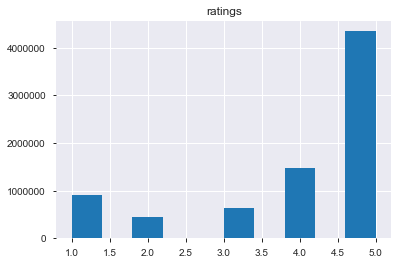

In [524]:
ratings_df.hist()

In [525]:
pp.ProfileReport(ratings_df)

Number of variables,3
Number of observations,7824481
Total Missing (%),0.0%
Total size in memory,179.1 MiB
Average record size in memory,24.0 B
Numeric,1
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [526]:
print(color.BOLD,color.GREEN,"20 users who gave highest number of ratings",color.END)
ratings_df.userId.value_counts().head(20)

  20 users who gave highest number of ratings 


A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A38RMU1Y5TDP9     282
A3EXWV8FNSSFL6    282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
Name: userId, dtype: int64

# Descriptive Analysis Inference

1. Number of variables	3
2. Number of observations	7824481
3. No missing values (no na or null) and so no imputation was done
4. It is observed that 5 star ratings are dominant in the data set
5. We disposed the timestamp feature, which is not much of use
6. Also we renamed the columns to userId, productId and ratings for ease of uasge & understanding


__2.Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the
users only who has given 30 or more number of ratings )__

In [564]:
ratings_1_df = ratings_df.sample(int(rows * filter_percent))

In [565]:
ratings_filtered_df = ratings_1_df.groupby('userId').filter(lambda rec : len(rec)>min_ratings)

In [566]:
ratings_filtered_df.shape

(559, 3)

In [567]:
ratings_1_df.shape

(782448, 3)

In [568]:
ratings_filtered_df.sample(10)

,userId,productId,ratings
6140695,ARBKYIVNYWK3C,B008ALA6DW,5.0
7273821,A2NOW4U7W3F7RI,B00CKK8GEU,5.0
7363028,A5JLAU2ARJ0BO,B00D6KQ2GC,2.0
905562,A2NOW4U7W3F7RI,B000F3MAU0,5.0
4197357,A2NOW4U7W3F7RI,B004JHVJ5A,5.0
458603,A5JLAU2ARJ0BO,B0002DV9DM,2.0
3972743,ARBKYIVNYWK3C,B0049WBZEK,4.0
123263,A5JLAU2ARJ0BO,B00005T3SM,5.0
4493135,A2NOW4U7W3F7RI,B004URCE4O,5.0
2337360,A3PD8JD9L4WEII,B001U3ZH7W,4.0


# 3. Build Popularity Recommender model.

# First  top 5 popular Products

In [569]:

ratings_filtered_df.groupby('productId')['ratings'].mean().sort_values(ascending=False).head(5)

productId
B00KWL62QI    5.0
B001HLF2KO    5.0
B001L4A76G    5.0
B001L6LG5K    5.0
B001LQSFKY    5.0
Name: ratings, dtype: float64

# First  top 10 popular Products

In [570]:

ratings_filtered_df.groupby('productId')['ratings'].mean().sort_values(ascending=False).head(10)

productId
B00KWL62QI    5.0
B001HLF2KO    5.0
B001L4A76G    5.0
B001L6LG5K    5.0
B001LQSFKY    5.0
B001MSU1FS    5.0
B001NPDA44    5.0
B001SEQPJ2    5.0
B001TH7GUK    5.0
B001TI9F8U    5.0
Name: ratings, dtype: float64

# Collabrative Filtering

In [571]:
from surprise import Reader,Dataset

In [572]:
#set rating scale
reader = Reader(rating_scale=(1,5))

In [573]:
rating_data = Dataset.load_from_df(ratings_filtered_df, reader)

In [574]:
rating_data

# 4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)

In [575]:
from surprise.model_selection import train_test_split

In [576]:
train_set, test_set = train_test_split(rating_data,test_size=0.3,random_state=2)

In [577]:
#in surprise format there will be inner id created for user id. let us check that with one sample

print("User id for inner id 0  =  ",train_set.to_raw_uid(0))
print("Product id for inner id 0  = ",train_set.to_raw_iid(0))


User id for inner id 0  =   ARBKYIVNYWK3C
Product id for inner id 0  =  B00419V4L0


In [578]:
from surprise import KNNWithMeans,accuracy,Prediction

# 5. Collaborative Filtering

# __ITEM BASED COLLABRATIVE FILTERING__

In [579]:
#k in the following is the number of nearest neighbours to be considered. 
# item based and similarity option is pearson correlation coeffient
algo = KNNWithMeans(k=5,sim_options={'name':'pearson','user_based':False})
algo.fit(train_set)
test_pred = algo.test(test_set)
accuracy.rmse(test_pred)

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9044


0.9044014622952085

In [580]:
test_pred[0]
test_pred[1]

Prediction(uid='A5JLAU2ARJ0BO', iid='B0006BKGAW', r_ui=3.0, est=4.31457800511509, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

# __USER BASED COLLABRATIVE FILTERING__

In [581]:
#k in the following is the number of nearest neighbours to be considered. 
# user based and similarity option is cosine correlation coeffient
algo = KNNWithMeans(k=5,sim_options={'name':'cosine','user_based':True})
algo.fit(train_set)
test_pred = algo.test(test_set)
accuracy.rmse(test_pred)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9014


0.9014349178827086

In [582]:
test_pred[1]


Prediction(uid='A5JLAU2ARJ0BO', iid='B0006BKGAW', r_ui=3.0, est=4.31457800511509, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

In [583]:
test_pred[2]

Prediction(uid='A17BUUBOU0598B', iid='B000UH8I66', r_ui=4.0, est=4.31457800511509, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'})

In [584]:
test_pred_df = pd.DataFrame(test_pred)

# Finding the Best Model using GridSearhCV

In [585]:
from surprise.model_selection.search import GridSearchCV

In [586]:
param_grid = {'k':[10,50], 'sim_options':{'name':['cosine','pearson'],'user_based':[True,False]}}

In [587]:
grid_cv = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'],cv=5,refit=True)
grid_cv.fit(rating_data)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing

# 6. Evaluate the above model. ( Once the model is trained on the training data, it can be sed to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.

In [588]:
print(color.BLUE,grid_cv.best_score['rmse'])

 0.901533072459727


In [589]:
print(grid_cv.best_params['rmse'])

{'k': 10, 'sim_options': {'name': 'cosine', 'user_based': True}}


In [590]:
result_df = pd.DataFrame(grid_cv.cv_results)

In [591]:
y_pred  = grid_cv.test(test_set)

# 7. Generate Top 5 recomendation

In [593]:
pred_df = pd.DataFrame(y_pred)

In [594]:
pred_df.shape

(168, 5)

In [595]:
pred_df.sort_values(by = ["uid", "est"],ascending=False,inplace=True)
top_5_recos = pred_df.groupby("uid").head(5).reset_index(drop=True)

In [596]:
pd.set_option('display.width', 1000)
for record in test_set:
    print(color.BOLD, color.UNDERLINE,color.BLUE ,"Following are the top 5 recomendatations for the User Id" , record[0],color.END)
    results = top_5_recos[top_5_recos["uid"]==record[0]]
    print(color.BOLD,color.GREEN, results[['iid','est']], color.END)
    print("\n")

   Following are the top 5 recomendatations for the User Id A36K2N527TXXJN 
             iid  est
40  B00FW6T36Y  5.0
41  B00HF9MZZW  5.0
42  B003VSTDFG  5.0
43  B002Q8IHDQ  5.0
44  B003OBXHPC  5.0 


   Following are the top 5 recomendatations for the User Id A5JLAU2ARJ0BO 
             iid  est
20  B00005Q7DH  5.0
21  B00006HXRA  5.0
22  B0001G0FGW  5.0
23  B00006L9CT  5.0
24  B0001G6U5W  5.0 


   Following are the top 5 recomendatations for the User Id A17BUUBOU0598B 
             iid  est
70  B000UH8I66  4.0
71  B000UKMZ94  4.0
72  B00AM4A87O  4.0
73  B000VM3QIU  4.0
74  B000V9USBG  4.0 


   Following are the top 5 recomendatations for the User Id A17BUUBOU0598B 
             iid  est
70  B000UH8I66  4.0
71  B000UKMZ94  4.0
72  B00AM4A87O  4.0
73  B000VM3QIU  4.0
74  B000V9USBG  4.0 


   Following are the top 5 recomendatations for the User Id A5JLAU2ARJ0BO 
             iid  est
20  B00005Q7DH  5.0
21  B00006HXRA  5.0
22  B0001G0FGW  5.0
23  B00006L9CT  5.0
24  B0001G6U5W  5.0 

             iid  est
20  B00005Q7DH  5.0
21  B00006HXRA  5.0
22  B0001G0FGW  5.0
23  B00006L9CT  5.0
24  B0001G6U5W  5.0 


   Following are the top 5 recomendatations for the User Id A3OXHLG6DIBRW8 
             iid  est
30  B000G6U4O0  5.0
31  B00BXF5FU6  5.0
32  B0012UF0Y8  5.0
33  B00004Z5M1  5.0
34  B000Z99ZCA  5.0 


   Following are the top 5 recomendatations for the User Id A17BUUBOU0598B 
             iid  est
70  B000UH8I66  4.0
71  B000UKMZ94  4.0
72  B00AM4A87O  4.0
73  B000VM3QIU  4.0
74  B000V9USBG  4.0 


   Following are the top 5 recomendatations for the User Id A680RUE1FDO8B 
             iid  est
15  B000RVWDKC  5.0
16  B009UNGYHG  5.0
17  B002YU83YO  5.0
18  B0006I09OS  5.0
19  B00169N0BK  5.0 


   Following are the top 5 recomendatations for the User Id A6FIAB28IS79 
             iid  est
10  B0007OWASE  5.0
11  B00B5HE3UU  5.0
12  B000NK8EWI  5.0
13  B000R805L4  5.0
14  B00006I5FQ  5.0 


   Following are the top 5 recomendatations for the User Id A5JLAU2ARJ0BO 

            iid  est
0  B002Q02CHG  5.0
1  B009L946F6  5.0
2  B000067RT6  5.0
3  B000GFWFY8  5.0
4  B00006B8JX  5.0 


   Following are the top 5 recomendatations for the User Id A2B7BUH8834Y6M 
             iid  est
50  B004CLYEH8  5.0
51  B0006SQWR6  5.0
52  B0001WW3F2  5.0
53  B0000C3GWV  5.0
54  B00BXF5FVU  5.0 


   Following are the top 5 recomendatations for the User Id A23GFTVIETX7DS 
             iid  est
60  B001FA1NZK  5.0
61  B002C744K6  5.0
62  B00FDKAFAW  5.0
63  B0078ZZ5NM  4.0
64  B005JK00XS  4.0 


   Following are the top 5 recomendatations for the User Id A5JLAU2ARJ0BO 
             iid  est
20  B00005Q7DH  5.0
21  B00006HXRA  5.0
22  B0001G0FGW  5.0
23  B00006L9CT  5.0
24  B0001G6U5W  5.0 


   Following are the top 5 recomendatations for the User Id A2AY4YUOX2N1BQ 
             iid  est
55  B004KJE8FU  5.0
56  B0001JZW8K  5.0
57  B0037NZ2MI  5.0
58  B00009R7BD  5.0
59  B0007Y79E4  5.0 


   Following are the top 5 recomendatations for the User Id A5JLAU2ARJ0BO 
   

   Following are the top 5 recomendatations for the User Id A3PD8JD9L4WEII 
             iid  est
25  B00AW3PNLQ  5.0
26  B00184769U  5.0
27  B00020S7XK  5.0
28  B007EUO2F8  5.0
29  B008XGS9G0  5.0 


   Following are the top 5 recomendatations for the User Id A2NOW4U7W3F7RI 
             iid  est
45  B00HIUL1JO  5.0
46  B000087NBU  5.0
47  B003LSTD38  5.0
48  B00G6BQ31W  5.0
49  B004JHVJ5A  5.0 


   Following are the top 5 recomendatations for the User Id A3OXHLG6DIBRW8 
             iid  est
30  B000G6U4O0  5.0
31  B00BXF5FU6  5.0
32  B0012UF0Y8  5.0
33  B00004Z5M1  5.0
34  B000Z99ZCA  5.0 


   Following are the top 5 recomendatations for the User Id A23GFTVIETX7DS 
             iid  est
60  B001FA1NZK  5.0
61  B002C744K6  5.0
62  B00FDKAFAW  5.0
63  B0078ZZ5NM  4.0
64  B005JK00XS  4.0 


   Following are the top 5 recomendatations for the User Id A23GFTVIETX7DS 
             iid  est
60  B001FA1NZK  5.0
61  B002C744K6  5.0
62  B00FDKAFAW  5.0
63  B0078ZZ5NM  4.0
64  B005JK00XS  4.

# SVD Model

In [597]:
from surprise import SVD
from surprise import accuracy

In [598]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(train_set)

In [599]:
test_pred = svd_model.test(test_set)

In [600]:
accuracy.rmse(test_pred)

RMSE: 1.0757


1.0757451925467414

# 8 Summarise Your Insights

1. First we have used the popularity based Recommendation approach, it is more of generic and not personalized, we just derive the recommendations based on the top rated products. This way of recommending is simple and can be used where there is cold start issue(no mature data/less data) or for just signed in users

2. Next, we implemented Collabrative Filtering (IBCF and UBCF). User based Collaborative Filtering best works with cosine similarity where Item based CF works best with Pearson Correlation

3. Surprise package, this is the package which we used for collabrative filtering models and also while building we can use KNNMeans, KNNBasic algos 

4. Item based similarity finds the similar items based on the common users interaction(bought,liked etc) on them.
   User based similarity finds the similar users based on the common items they interacted(bought,liked etc). 

5. Later, we used the GridSearchCV for hyperparameter optimization and we derived the best model and calculated the RMSE and also derived the 5 recommendations for the users

6. The prediciton made out of this models, contain a important attribute under details called was_impossible which indicates whether the item/user had proper interaction to derive the recommendation. if was_impossible was false means proper prediction has happened for that result item. if it was true meaning the recommendation for the result item is not derived/predicted and a generic average value is assigned

7. If there are more was_impossible = true meaning there were no enough  data or we need to adjust the k value while building the model. large value of k may increase the possibility of deriving the prediction where as the accuracy of the model will be decreased and hence this k value must be properly set

8. Later we  built the SVD model and calculated the RMSE